# Statistics

In [1]:
from functions.statistics import *
from utilities import *

In [2]:
initial_path = '../data/CreateStudy'
s_json_files = get_json_paths(initial_path, 'S')

In [3]:
result = extract_fields_from_json_files(s_json_files, ['optimal_GMAC_NDH', 'optimal_GMAC_DH', 'min_max_std_GMAC_NDH', 'min_max_std_GMAC_DH', 'ARAT_score', 'FMA-UE_score', 'participant_id'])

In [4]:
PATIENT_ID = result['participant_id']
ARAT = result['ARAT_score']
FMA_UE = result['FMA-UE_score']

optimal_thresholds = result['optimal_GMAC_NDH']
COUNT_THRESHOLD = optimal_thresholds[:,0]
PITCH_THRESHOLD = optimal_thresholds[:,1]

min_max_std_optimal_thresholds_GMAC_NDH = result['min_max_std_GMAC_NDH']
STD_COUNT_NDH, STD_PITCH_NDH = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_NDH) 

### impaired arm

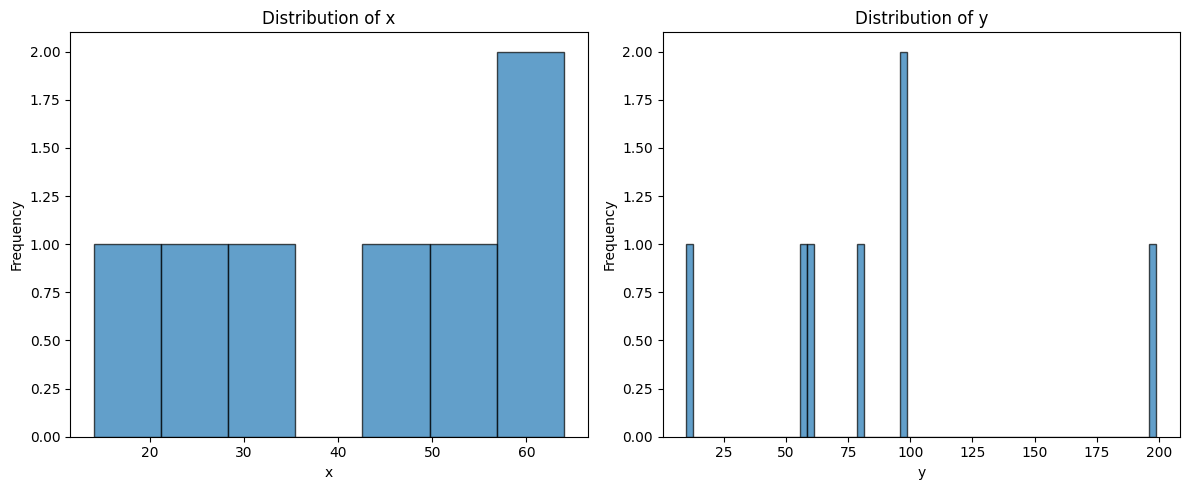

Linear model coefficients: [-2.33233951]
Linear model intercept: 182.03515981735157
Pearson Correlation: -0.7544660641896609
Spearman Correlation: -0.6785714285714287


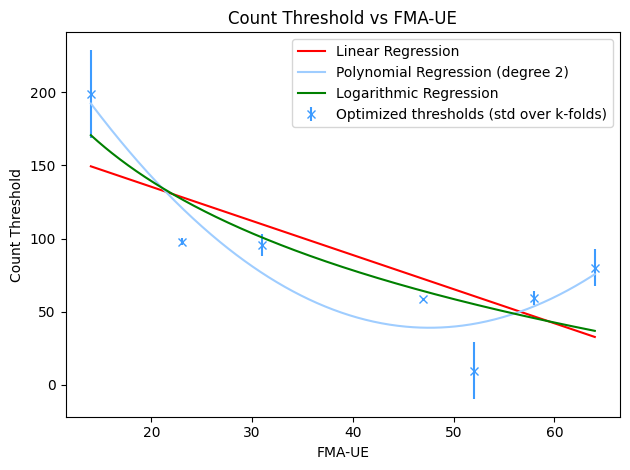

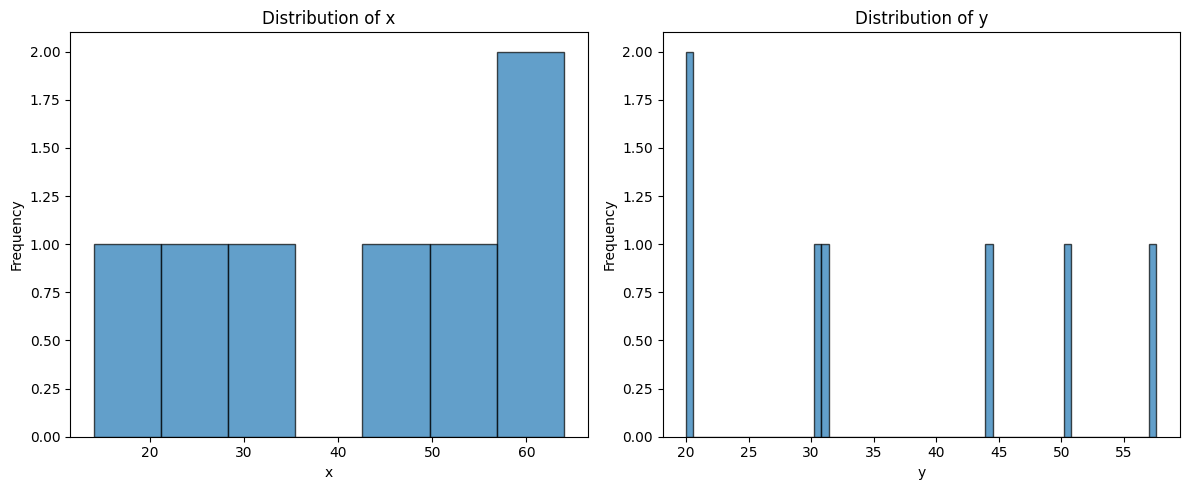

Linear model coefficients: [0.00972334]
Linear model intercept: 35.855707762557074
Pearson Correlation: 0.01243067537643403
Spearman Correlation: 0.09009374626955591


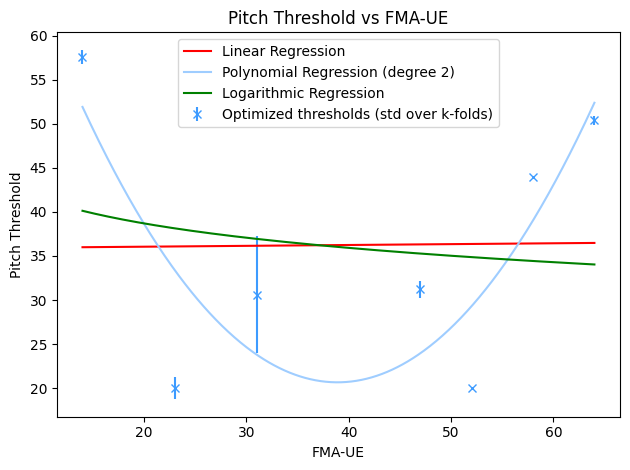

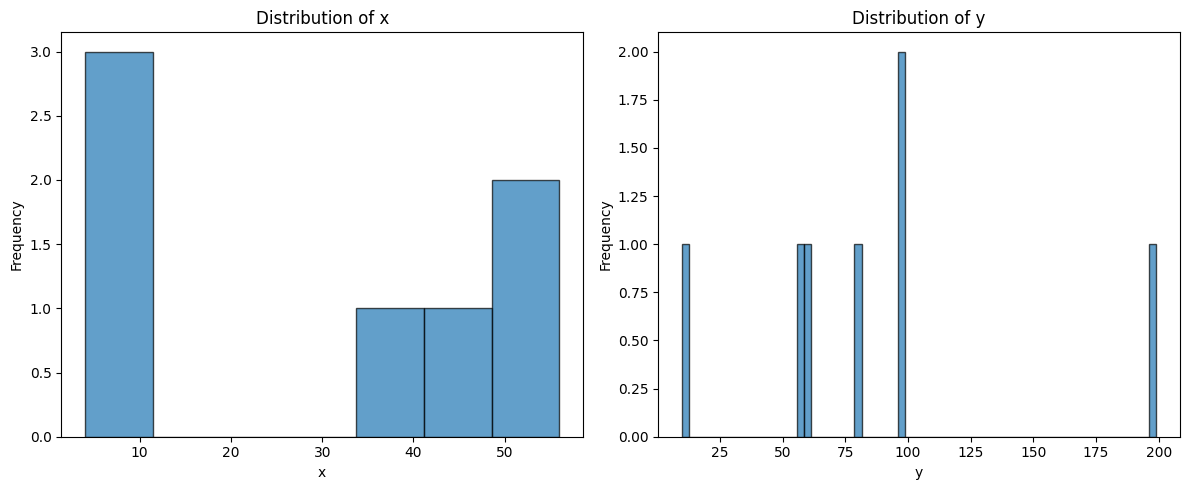

Linear model coefficients: [-1.73560458]
Linear model intercept: 135.57950293214185
Pearson Correlation: -0.6743727295161317
Spearman Correlation: -0.6666937223947136


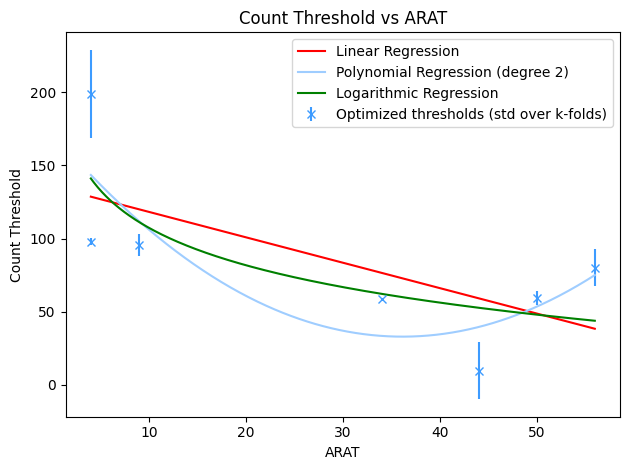

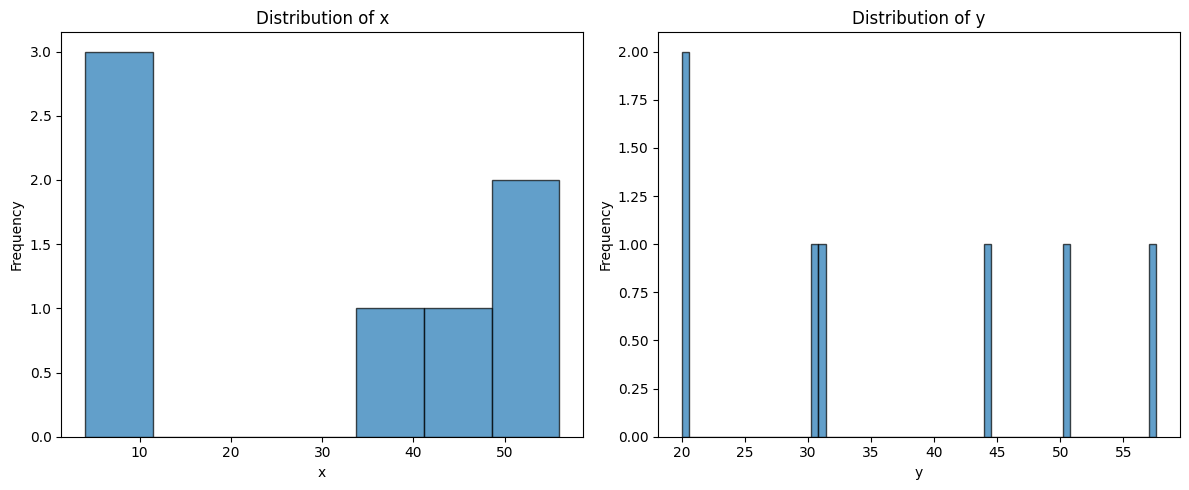

Linear model coefficients: [0.08513451]
Linear model intercept: 33.812566322256345
Pearson Correlation: 0.13073325790742027
Spearman Correlation: 0.19090909090909092


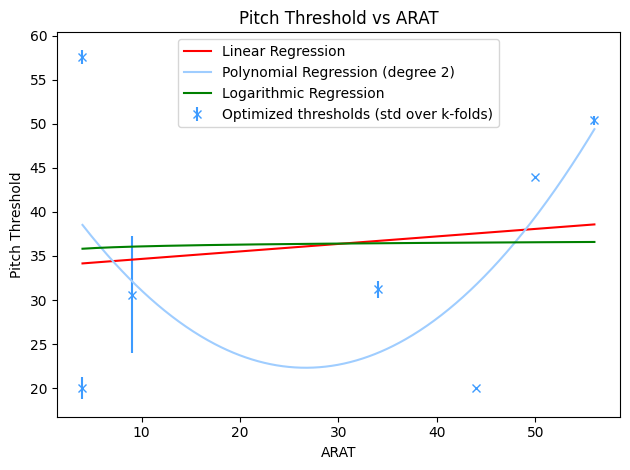

In [5]:
check_regression(FMA_UE, COUNT_THRESHOLD, STD_COUNT_NDH, x_label='FMA-UE', y_label='Count Threshold', title='Count Threshold vs FMA-UE')
check_regression(FMA_UE, PITCH_THRESHOLD, STD_PITCH_NDH, x_label='FMA-UE', y_label='Pitch Threshold', title='Pitch Threshold vs FMA-UE')
check_regression(ARAT, COUNT_THRESHOLD, STD_COUNT_NDH, x_label='ARAT', y_label='Count Threshold', title='Count Threshold vs ARAT')
check_regression(ARAT, PITCH_THRESHOLD, STD_PITCH_NDH, x_label='ARAT', y_label='Pitch Threshold', title='Pitch Threshold vs ARAT')

### healthy arm

In [6]:
optimal_thresholds = result['optimal_GMAC_DH']
COUNT_THRESHOLD_HEALTHY = optimal_thresholds[:,0]
PITCH_THRESHOLD_HEALTHY = optimal_thresholds[:,1]

min_max_std_optimal_thresholds_GMAC_DH = result['min_max_std_GMAC_DH']
STD_COUNT_DH, STD_PITCH_DH = extract_std_from_min_max_std(min_max_std_optimal_thresholds_GMAC_DH) 

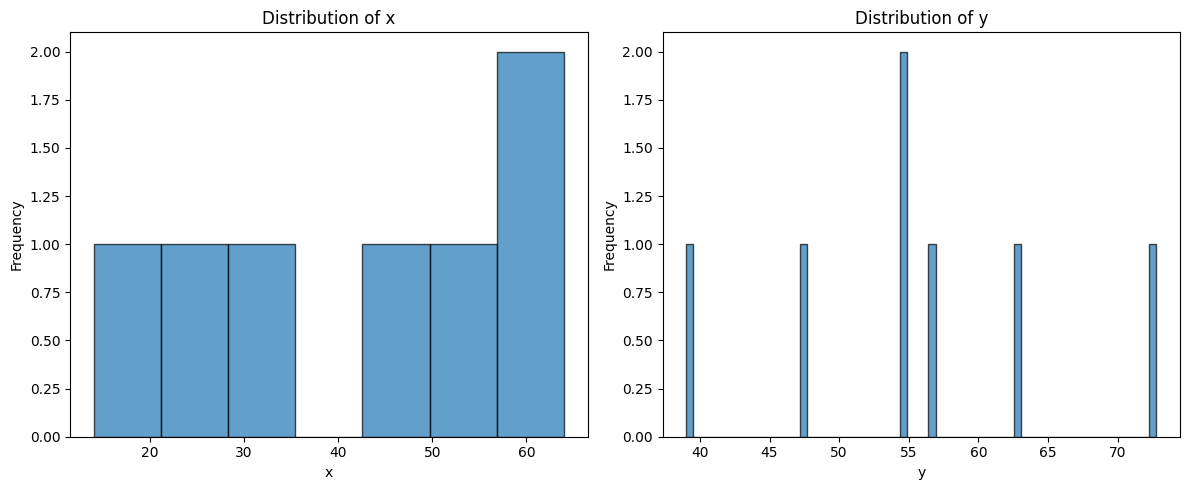

Linear model coefficients: [0.11792909]
Linear model intercept: 50.588356164383555
Pearson Correlation: 0.20656234340846658
Spearman Correlation: 0.14285714285714288


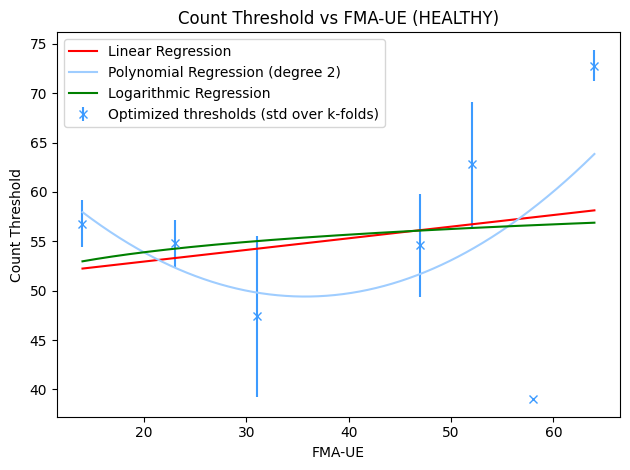

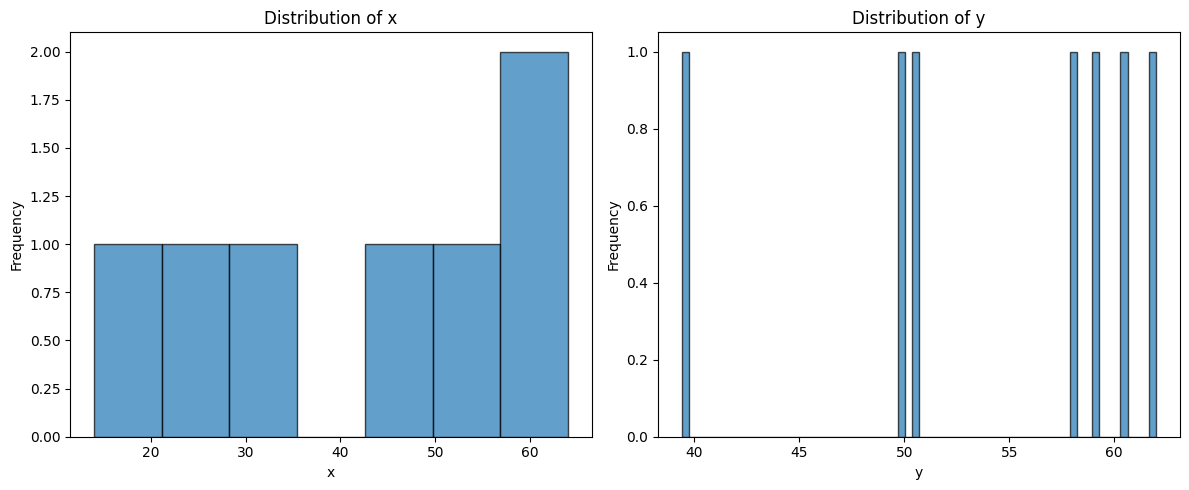

Linear model coefficients: [0.02620199]
Linear model intercept: 53.146803652968025
Pearson Correlation: 0.06108780085216524
Spearman Correlation: 0.10714285714285716


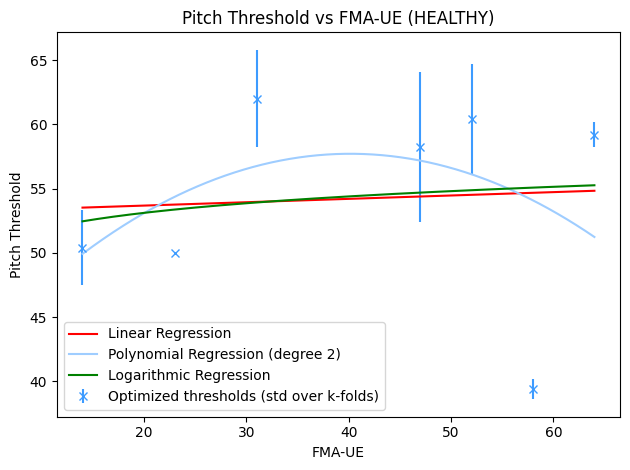

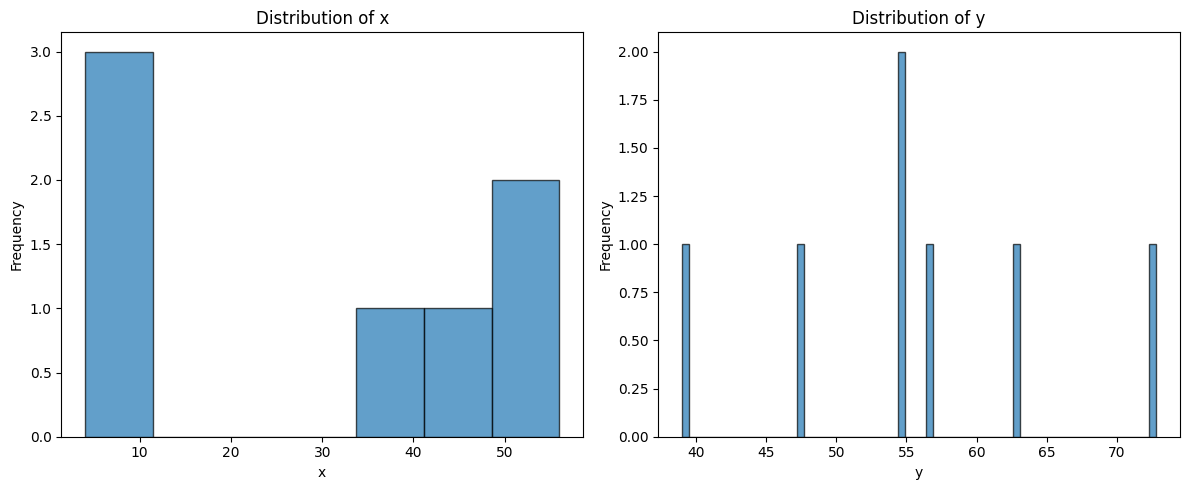

Linear model coefficients: [0.12136275]
Linear model intercept: 51.97229824071488
Pearson Correlation: 0.2553388391192444
Spearman Correlation: 0.16216874328520064


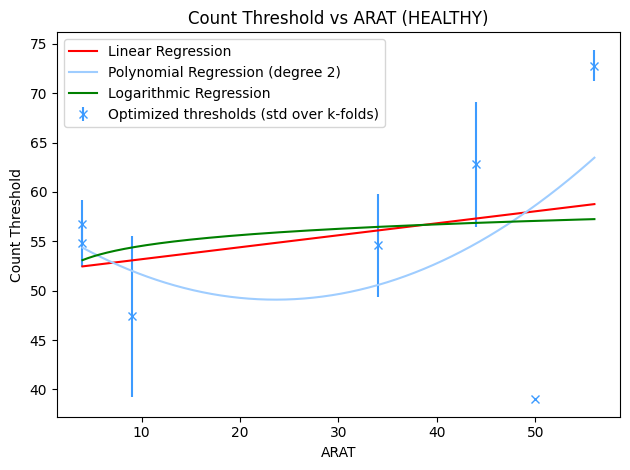

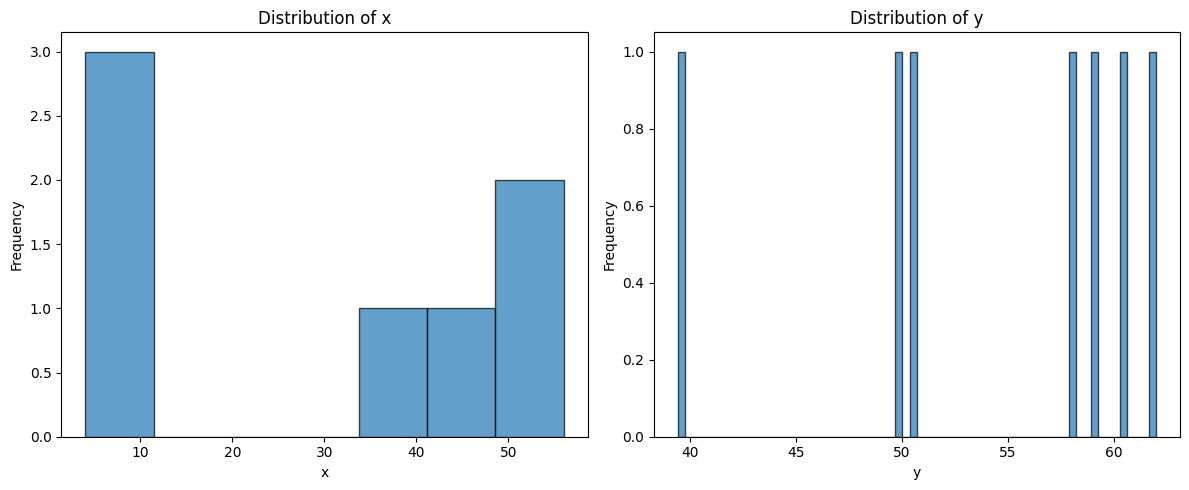

Linear model coefficients: [-0.0061063]
Linear model intercept: 54.40390952247974
Pearson Correlation: -0.017100144841337997
Spearman Correlation: 0.12613124477737825


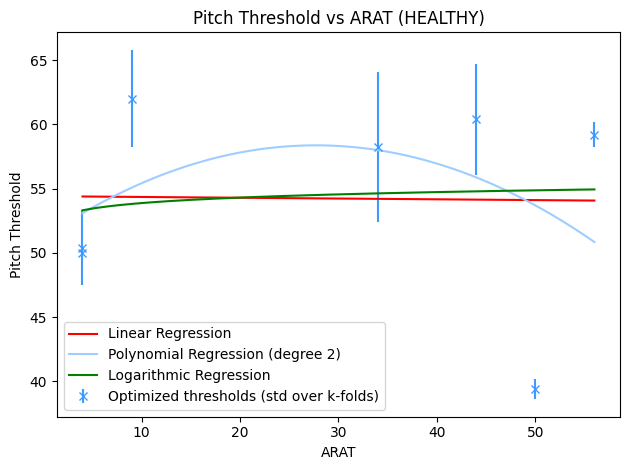

In [7]:
check_regression(FMA_UE, COUNT_THRESHOLD_HEALTHY, STD_COUNT_DH, x_label='FMA-UE', y_label='Count Threshold', title='Count Threshold vs FMA-UE (HEALTHY)')
check_regression(FMA_UE, PITCH_THRESHOLD_HEALTHY, STD_PITCH_DH, x_label='FMA-UE', y_label='Pitch Threshold', title='Pitch Threshold vs FMA-UE (HEALTHY)')
check_regression(ARAT, COUNT_THRESHOLD_HEALTHY, STD_COUNT_DH, x_label='ARAT', y_label='Count Threshold', title='Count Threshold vs ARAT (HEALTHY)')
check_regression(ARAT, PITCH_THRESHOLD_HEALTHY, STD_PITCH_DH, x_label='ARAT', y_label='Pitch Threshold', title='Pitch Threshold vs ARAT (HEALTHY)')

In [8]:
#plot_spearman_correlation(stroke_arat_score, optimal_AC_NDH_array, "Scatter Plot with Spearman Correlation and Linear Fit for Optimal AC (Aff. H)", None)